**Project Description**

Your task is to help optimize marketing expenses.

You have:
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

You are going to study:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off


### Step - Download the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits['Device'] = visits['Device'].astype('category')

In [6]:
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M")

In [7]:
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M")

In [8]:
visits.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [10]:
orders.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [11]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M")

In [13]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [14]:
orders.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
costs.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [16]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y.%m.%d")

In [18]:
costs.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


- We have optimized data: dates were converted to date types, column names were converted to lower caps, device types were converted to category for data to take less space

### Step - Make reports and calculate metrics

#### How many people use it every day, week, and month?

In [19]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [20]:
visits['visit_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['visit_week'] = visits['start_ts'].astype('datetime64[W]')
visits['visit_date'] = visits['start_ts'].dt.date

In [21]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [22]:
visits['visit_date'] = pd.to_datetime(visits['visit_date'])

In [23]:
dau = visits.groupby('visit_date')['uid'].nunique().reset_index()
print(int(dau['uid'].mean()))
dau.head()

907


,visit_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


Text(0.5, 1.0, 'DAU')

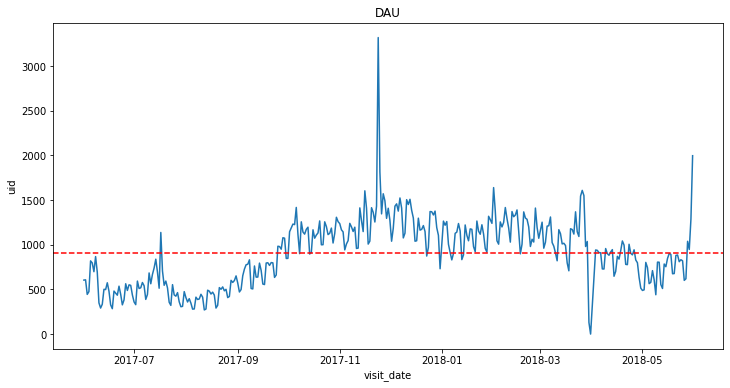

In [24]:
fig,graph= plt.subplots(figsize=(12,6))
graph =  sns.lineplot(data=dau, x="visit_date", y="uid")
graph.axhline(dau['uid'].mean(), linestyle="dashed", color='r')
graph.set_title("DAU")

In [25]:
wau = visits.groupby(['visit_year','visit_week'])['uid'].nunique().reset_index()
print(int(wau['uid'].mean()))
wau.head()

5621


,visit_year,visit_week,uid
0,2017-01-01,2017-06-01,4082
1,2017-01-01,2017-06-08,3311
2,2017-01-01,2017-06-15,2844
3,2017-01-01,2017-06-22,3079
4,2017-01-01,2017-06-29,3055


Text(0.5, 1.0, 'WAU')

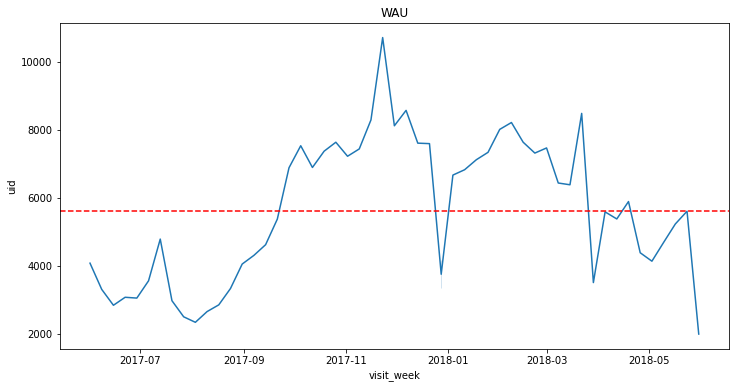

In [26]:
fig,graph= plt.subplots(figsize=(12,6))
graph =  sns.lineplot(data=wau, x="visit_week", y="uid")
graph.axhline(wau['uid'].mean(), linestyle="dashed", color='r')
graph.set_title("WAU")

In [27]:
mau = visits.groupby(['visit_year','visit_month'])['uid'].nunique().reset_index()
print(int(mau['uid'].mean()))
mau.head()


23228


,visit_year,visit_month,uid
0,2017-01-01,2017-06-01,13259
1,2017-01-01,2017-07-01,14183
2,2017-01-01,2017-08-01,11631
3,2017-01-01,2017-09-01,18975
4,2017-01-01,2017-10-01,29692


Text(0.5, 1.0, 'MAU')

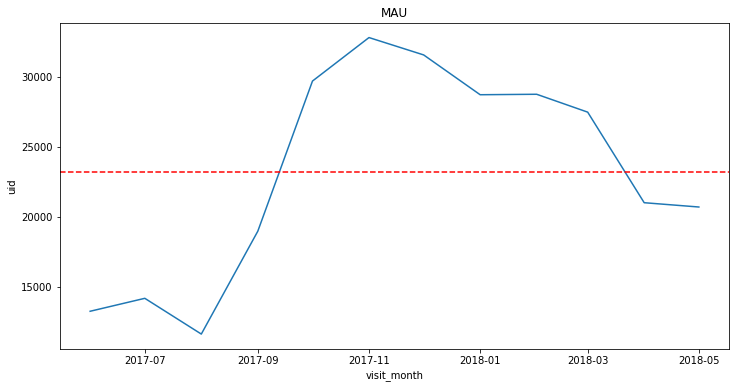

In [28]:

fig,graph= plt.subplots(figsize=(12,6))
graph =  sns.lineplot(data=mau, x="visit_month", y="uid")
graph.axhline(mau['uid'].mean(), linestyle="dashed", color='r')

graph.set_title("MAU")

**Average unique users:**

- Daily: 907
- Weekly: 5716
- Monthly: 23228

#### How many sessions are there per day? (One user might have more than one session.)

In [29]:
sessions_touch = visits[visits['device'] == 'touch']
daily_sessions_touch = sessions_touch.groupby('visit_date')['uid'].count().reset_index()
daily_sessions_touch.columns = ['visit_date', 'visits']

daily_sessions_touch['visits'].describe()

count    363.000000
mean     266.757576
std      110.862623
min       47.000000
25%      181.000000
50%      278.000000
75%      337.000000
max      890.000000
Name: visits, dtype: float64

In [30]:
daily_sessions_touch.head()

,visit_date,visits
0,2017-06-01,163
1,2017-06-02,160
2,2017-06-03,148
3,2017-06-04,161
4,2017-06-05,200


In [31]:
sessions_desktop = visits[visits['device'] == 'desktop']
daily_sessions_desktop = sessions_desktop.groupby('visit_date')['uid'].count().reset_index()
daily_sessions_desktop.columns = ['visit_date', 'visits']

daily_sessions_desktop['visits'].describe()

count     364.000000
mean      721.337912
std       322.327697
min         1.000000
25%       457.250000
50%       711.000000
75%       961.500000
max      3152.000000
Name: visits, dtype: float64

In [32]:
daily_sessions_desktop.head()

,visit_date,visits
0,2017-06-01,501
1,2017-06-02,498
2,2017-06-03,329
3,2017-06-04,349
4,2017-06-05,693


- On touch devices, there are on average 8069 daily visits
- On desktop devices, there are on average 22000 daily visits
- **Seems more people visit from their computers than from their phones**

#### What is the length of each session?

In [33]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits.head()


,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0.0


In [34]:
pd.options.mode.chained_assignment = None

sessions_touch['session_duration'] = (sessions_touch['end_ts'] - sessions_touch['start_ts']).dt.total_seconds()
sessions_desktop['session_duration'] = (sessions_desktop['end_ts'] - sessions_desktop['start_ts']).dt.total_seconds()

<AxesSubplot:title={'center':'Length of Sessions'}, xlabel='session duration', ylabel='visits'>

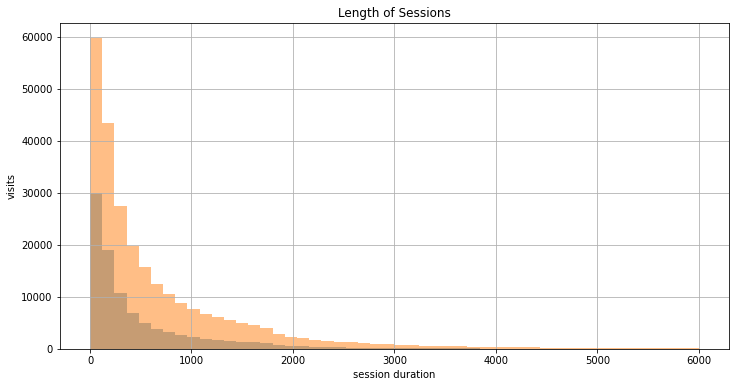

In [35]:
plt.title('Length of Sessions')

plt.xlabel('session duration')

plt.ylabel('visits')
sessions_touch['session_duration'].hist(bins=50, alpha=0.5, range=(0, 6000), figsize=(12,6))
sessions_desktop['session_duration'].hist(bins=50, alpha=0.5, range=(0, 6000), figsize=(12,6))


In [36]:
print(sessions_desktop['session_duration'].mode())
print(sessions_touch['session_duration'].mode())

0    60.0
dtype: float64
0    60.0
dtype: float64


- Session lengths are not evenly distributed, so to measure the average session length we use the mode.
- Users from both Desktop and Touch devices have sessions of average length of 60 seconds.



#### What's the user retention rate?

In [37]:
first_visit_month = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit_month.columns = ['uid', 'first_visit_month']
visits = visits.merge(first_visit_month, on='uid')
visits['first_visit_month'] = visits['first_visit_month'].astype('datetime64[M]')

visits['visit_date'] = visits['start_ts'].astype('datetime64[M]')

visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,session_duration,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-01,1080.0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-01,1680.0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-01,1440.0,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-01,1680.0,2018-03-01


In [38]:
visits['cohort_lifetime'] = pd.to_datetime(visits['visit_date']) - pd.to_datetime(visits['first_visit_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,session_duration,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-01,1080.0,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-01,1680.0,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-01,1440.0,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-01,1680.0,2018-03-01,0


In [39]:
cohorts = (visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [40]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0] [['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
initial_users_count.head()

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [41]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


In [42]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')
retention_pivot .index = retention_pivot.index.to_series().dt.strftime('%Y-%m')
retention_pivot 


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


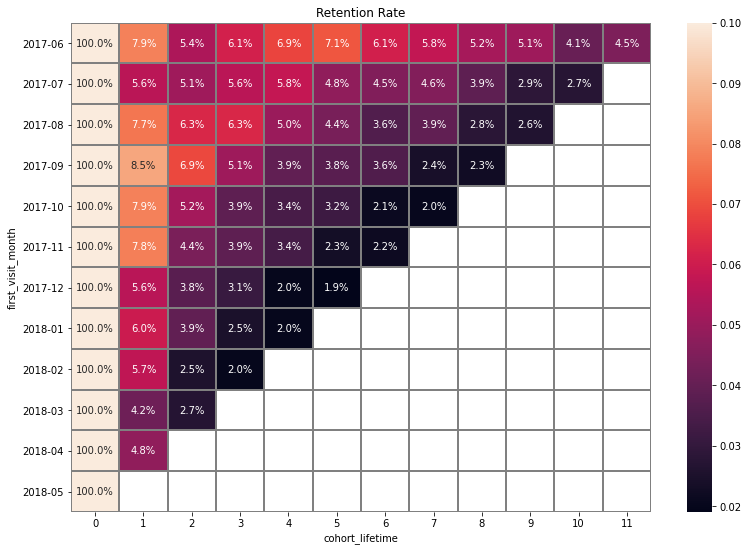

In [43]:
retention_pivot.index = retention_pivot.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot, annot = True, fmt = '.1%', linewidths=1, linecolor='grey', vmax=0.1).set(title='Retention Rate')
plt.show()


- Buyers who made their first visit on the sencond semester of the year (exclusing December) seem to have a higher retention rate than those who made their first visit on the first semester of the year
- There seems to be an increase in retention rate toward the 11th month
- The cohort that made a first purchase on the 6th month seems to have the highest retention of all

#### When do people start buying? 

In [44]:
# Time of first order

first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']

first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit'] 

In [45]:
conversions = first_order.merge(first_visits, on='uid')

conversions['first_order'] = conversions['first_order'].astype('datetime64[M]')
conversions['first_visit'] = conversions['first_visit'].astype('datetime64[M]')

conversions['conversion_days'] = (((conversions['first_order']) - pd.to_datetime(conversions['first_visit']))/ np.timedelta64(1, 'D'))

conversions.head()


,uid,first_order,first_visit,conversion_days
0,313578113262317,2018-01-01,2017-09-01,122.0
1,1575281904278712,2017-06-01,2017-06-01,0.0
2,2429014661409475,2017-10-01,2017-10-01,0.0
3,2464366381792757,2018-01-01,2018-01-01,0.0
4,2551852515556206,2017-11-01,2017-11-01,0.0


In [46]:
conversions['conversion_days'].describe()

count    36523.000000
mean        16.604496
std         46.826156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        334.000000
Name: conversion_days, dtype: float64

<AxesSubplot:title={'center':'Conversion Times'}, ylabel='Frequency'>

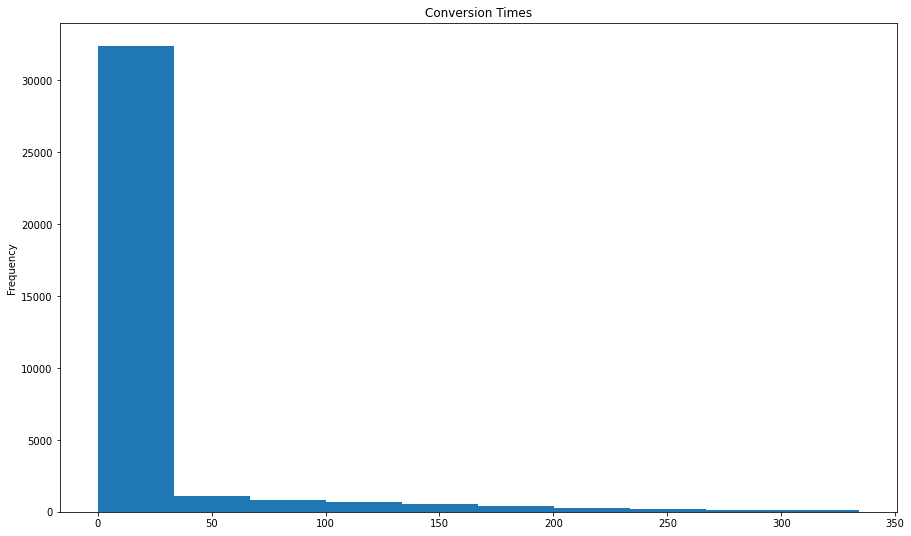

In [47]:
conversions['conversion_days'].plot.hist(bins=10, figsize=(15, 9), title='Conversion Times')

In [48]:
conversion_rate = (orders['uid'].nunique()/visits['uid'].nunique()) * 100
print(conversion_rate)

16.006994815246596


- Most users convert on the same day of their first visit
- A smaller percentage converts later on, from 28 to 334 days after their first visit
- Conversion rate is 16%

#### How many orders do they make during a given period of time?

In [49]:
first_order_month = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_month.columns = ['uid', 'first_order_month']
first_order_month['first_order_month'] = first_order_month['first_order_month'].astype('datetime64[M]')

orders2 = orders.merge(first_order_month, on='uid')

orders2['order_month'] = orders2['buy_ts'].astype('datetime64[M]')
orders2.head()

,buy_ts,revenue,uid,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [50]:
cohort_size = orders2.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'cohort_size']
cohort_size.head()

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [51]:
cohort = orders2.groupby(['first_order_month', 'order_month'])['revenue'].count().reset_index()
cohort.columns = ['first_order_month', 'order_month', 'orders']
cohort = cohort.merge(cohort_size, on='first_order_month')
cohort.head()

,first_order_month,order_month,orders,cohort_size
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023
2,2017-06-01,2017-08-01,174,2023
3,2017-06-01,2017-09-01,226,2023
4,2017-06-01,2017-10-01,292,2023


In [52]:
cohort['cohort_lifetime'] = pd.to_datetime(cohort['order_month']) - pd.to_datetime(cohort['first_order_month'])
cohort['cohort_lifetime'] = cohort['cohort_lifetime'] / np.timedelta64(1, 'M')
cohort['cohort_lifetime'] = cohort['cohort_lifetime'].round().astype(int)
cohort.head()

,first_order_month,order_month,orders,cohort_size,cohort_lifetime
0,2017-06-01,2017-06-01,2354,2023,0
1,2017-06-01,2017-07-01,177,2023,1
2,2017-06-01,2017-08-01,174,2023,2
3,2017-06-01,2017-09-01,226,2023,3
4,2017-06-01,2017-10-01,292,2023,4


In [53]:
cohort['orders_per_buyer'] = cohort['orders']/cohort['cohort_size']
cohort.head()
cohort['orders_per_buyer'].describe()

count    79.000000
mean      0.228110
std       0.401973
min       0.012480
25%       0.030941
50%       0.051703
75%       0.086752
max       1.179368
Name: orders_per_buyer, dtype: float64

In [54]:
cohort_piv = cohort.pivot_table(index='first_order_month', columns = 'cohort_lifetime', values='orders_per_buyer', aggfunc='sum').cumsum(axis=1)
cohort_piv.index = cohort_piv.index.to_series().dt.strftime('%Y-%m')
cohort_piv


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Orders per buyer'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

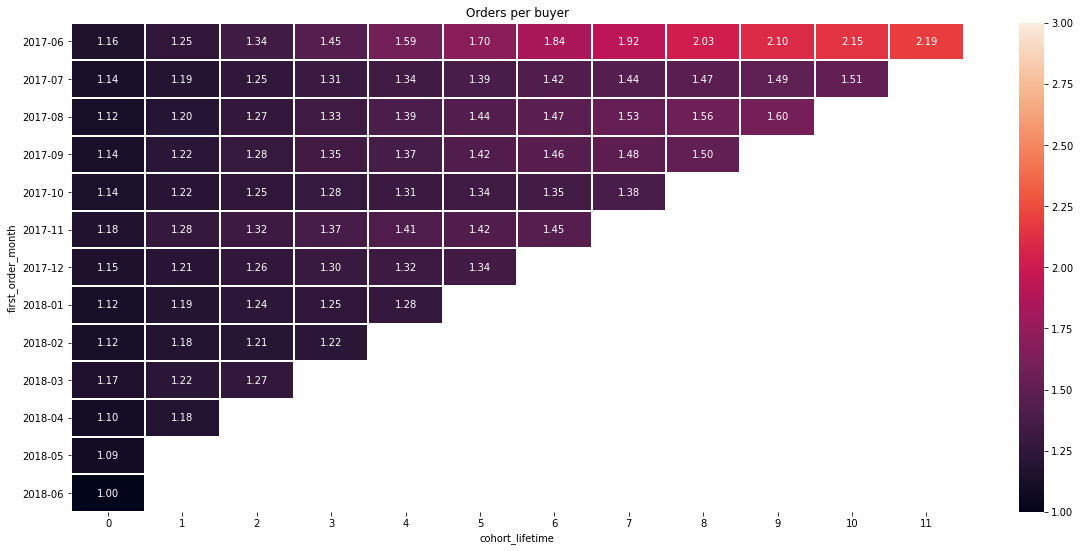

In [55]:
plt.figure(figsize=(20, 9))
plt.title('Orders per buyer')
sns.heatmap(
    cohort_piv,
    annot=True,
    fmt='.2f', vmax=3,
    linewidths=1,
    linecolor='white')


- The people in the cohort that made a first purchase on 2017-06-01 are placing the largest amount of orders.
- All the cohorts seem to be increasing their orders as months go by 
- On average, each buyer places 0.223 orders per month

#### What is the average purchase size?

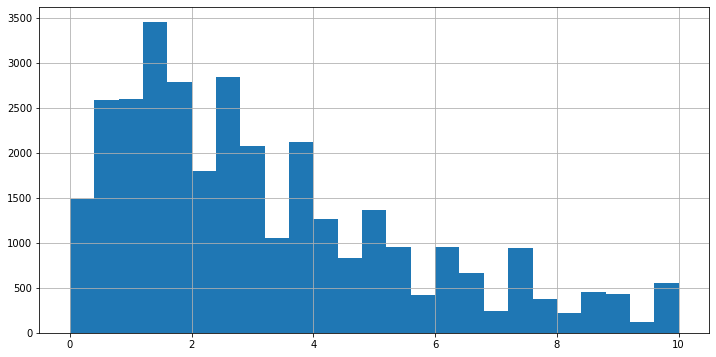

In [56]:
avg_order_size = orders2.groupby(['uid'])['revenue'].sum().reset_index()
avg_order_size['revenue'].hist(bins=25,range=(0,10), figsize=(12,6))

avg_order_size['revenue'].describe()



avg_order_size = orders2.groupby(['uid']).agg({'revenue':['count','sum']}).reset_index()


In [57]:
orders2['cohort_lifetime'] = orders2['order_month'] - orders2['first_order_month']
orders2['cohort_lifetime']  = (orders2['cohort_lifetime']/np.timedelta64(1,'M')).round().astype(int)
orders2.head()

,buy_ts,revenue,uid,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0


In [58]:
orders2['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [59]:
avg_purchase_size = orders2.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue', aggfunc='mean')
avg_purchase_size = avg_purchase_size.fillna('')
avg_purchase_size.index = avg_purchase_size.index.to_series().dt.strftime('%Y-%m')
avg_purchase_size


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07,5.287123,6.4461,9.992083,6.637596,4.721806,3.659512,3.789508,5.4544,5.34569,11.79,5.648302,
2017-08,4.715479,5.987315,6.2812,6.617901,7.962941,6.265323,5.89,7.11359,8.702826,5.598478,,
2017-09,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.76713,11.206607,7.785574,,,
2017-10,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.00912,,,,
2017-11,4.370717,4.103955,4.47467,6.284976,4.441471,3.72678,4.598235,,,,,
2017-12,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,,,,,,
2018-01,3.687417,4.438482,6.454969,7.524844,2.711282,,,,,,,
2018-02,3.706266,4.576486,3.453735,3.867143,,,,,,,,


- Each average purchase is between 2.5 and 4.9

#### How much money do they bring? (LTV)

In [60]:
cohorts2 = orders2.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts2.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [61]:
cohorts2 = pd.merge(cohort_size, cohorts2, on='first_order_month')
cohorts2.head()


,first_order_month,cohort_size,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [62]:
margin_rate = 1
cohorts2['age'] = (cohorts2['order_month'] - cohorts2['first_order_month'])/np.timedelta64(1,'M')
cohorts2['age'] = cohorts2['age'].round().astype('int')

cohorts2['ltv'] = cohorts2['revenue'] * margin_rate / cohorts2['cohort_size']

cohorts2.head()

,first_order_month,cohort_size,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [63]:
cohorts2['ltv'].describe()

count    79.000000
mean      1.149639
std       1.718082
min       0.053879
25%       0.185992
50%       0.391277
75%       0.830299
max       6.010218
Name: ltv, dtype: float64

In [64]:
output = cohorts2.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1)
output.index = output.index.to_series().dt.strftime('%Y-%m')
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'LTV'}, xlabel='age', ylabel='first_order_month'>

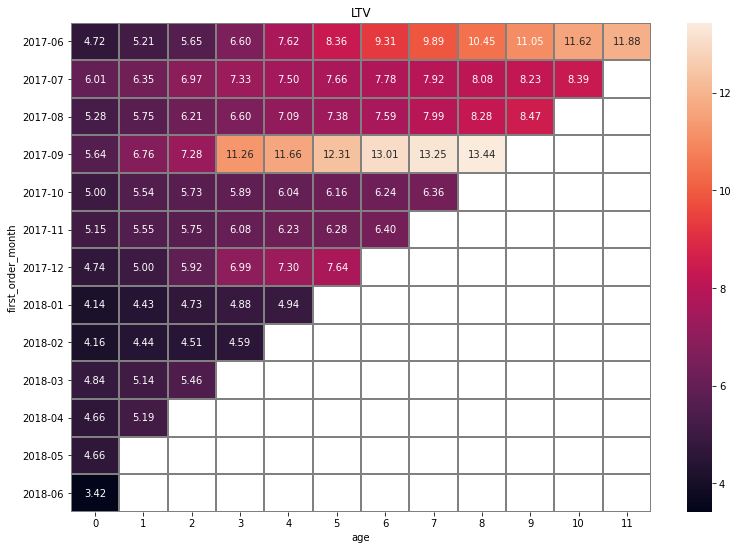

In [65]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray')



- Each customer brings in on average between 0.39 and 1.15 ltv
- The cohort that placed its first order on 2017-09-01 has been the most profitable for the company
- The cohort that placed its first orders on 2018-02-01 seems to be the least profitable, when comparing it with other cohorts' cumulative ltv's

#### How much money was spent? Overall/per source/over time

In [66]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [67]:
costs['costs'].sum()

329131.62

Text(0.5, 1.0, 'Cost per Source')

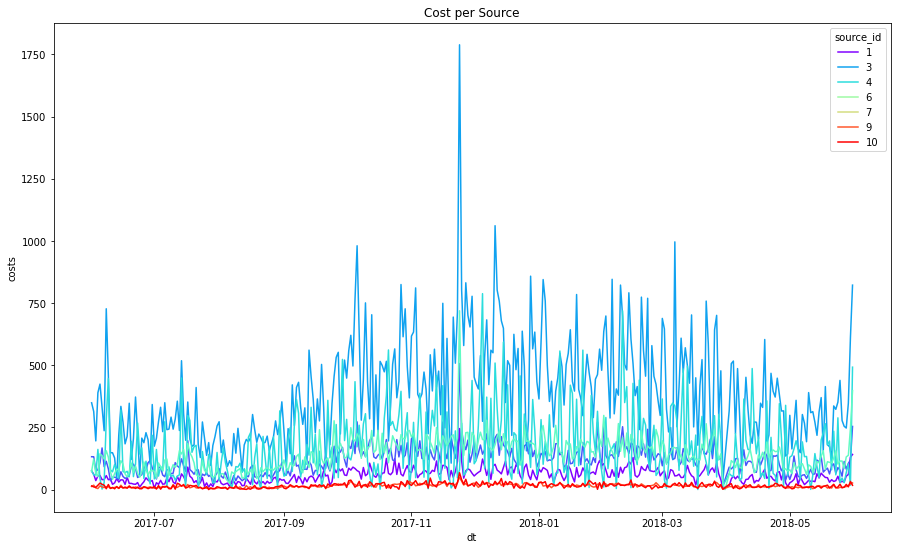

In [68]:
fig,graph2= plt.subplots(figsize=(15,9))
graph2 =  sns.lineplot(data=costs, x="dt", y="costs", hue='source_id', palette='rainbow')
graph2.set_title("Cost per Source")

In [69]:
costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


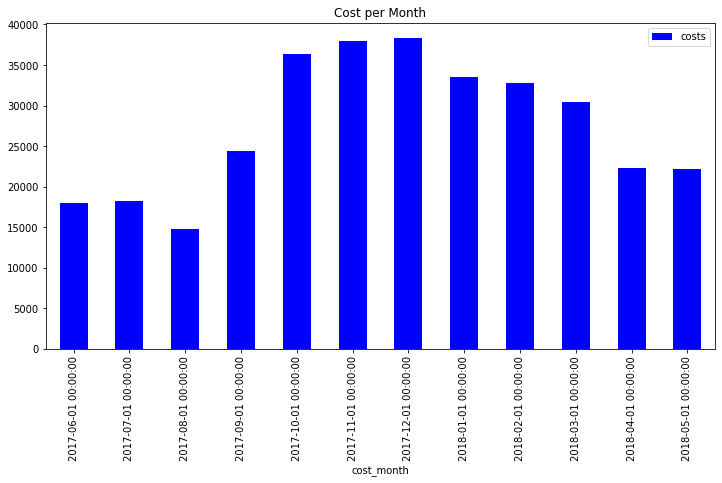

In [70]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs_over_time = costs.groupby('cost_month')['costs'].sum().reset_index()
costs_over_time.plot(x= 'cost_month', y='costs', kind='bar', title = 'Cost per Month', figsize=(12,6), stacked=True, color='blue')

costs_over_time

- Sources 3, 4 and 5 are the most expensive overall
- Source 3 had a drastic peak in month 12, whileother sources do not show such a drastic increase
- Months 11 and 12 of 2017 have been the most expensive overall, which makes sense
- Month 08 has been the least expensive

#### How much did customer acquisition from each of the sources cost?

In [71]:
#Checking if users come strictly from one source

total_sources = visits.groupby(['uid'])['source_id'].nunique().reset_index()
total_sources[total_sources['source_id']!=1]

,uid,source_id
16,1260655184775459,2
37,2471247936243530,2
40,2892676062023446,3
52,3605148382144603,3
65,4735760515861892,2
...,...,...
228143,18445407535914413204,2
228146,18445456946869452085,3
228148,18445601152732270159,2
228154,18445884613277162497,3


In [72]:
#As not all users come from the same source, defining the first source they came from

first_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()
first_source.columns = ['uid', 'first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [73]:
orders3 = orders2.merge(first_source, on='uid')
orders3.head()

,buy_ts,revenue,uid,first_order_month,order_month,cohort_lifetime,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0,3


In [74]:
costs_per_month = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()
costs_per_month.head()

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [75]:
buyers_per_month_source = orders3.groupby(['first_order_month', 'first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['cost_month', 'source_id', 'buyers']
buyers_per_month_source.head()

,cost_month,source_id,buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [76]:
cac_per_source_month = costs_per_month.merge(buyers_per_month_source, on=['cost_month', 'source_id'])
cac_per_source_month['cac'] = cac_per_source_month['costs'] / cac_per_source_month['buyers']
cac_per_source_month = cac_per_source_month.groupby('source_id')['cac'].mean().reset_index()
cac_per_source_month

,source_id,cac
0,1,7.212107
1,2,12.504068
2,3,13.802743
3,4,6.439374
4,5,7.451938
5,9,5.413892
6,10,4.867125


<AxesSubplot:title={'center':'CAC per source'}, xlabel='source_id'>

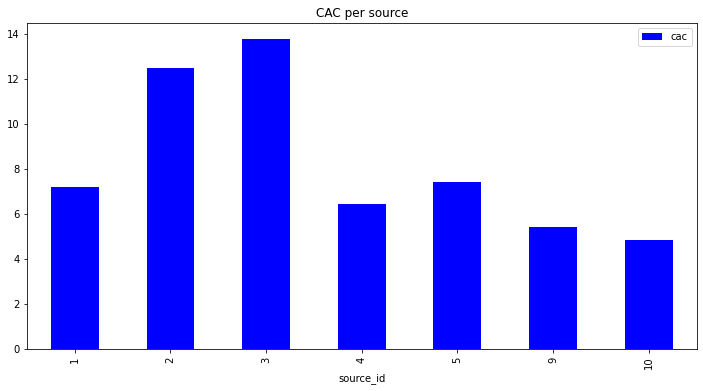

In [77]:
cac_per_source_month.plot(x= 'source_id', y='cac', kind='bar', title = 'CAC per source', figsize=(12,6), color='blue')


- Source 3 and 2 are the most expensive, per user
- Source 10 and 9 are the least expensive, per user

#### How worthwhile where the investments? (ROI)

In [78]:
ltv_per_source = orders3.groupby('first_source')[['uid', 'revenue']].agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source_id', 'buyers', 'revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['buyers'] 
ltv_per_source




,source_id,buyers,revenue,ltv
0,1,2899,31090.55,10.724577
1,2,3506,46923.61,13.383802
2,3,10473,54511.24,5.204931
3,4,10296,56696.83,5.506685
4,5,6931,52624.02,7.592558
5,7,1,1.22,1.220000
6,9,1088,5759.40,5.293566
7,10,1329,4450.33,3.348631


In [79]:
romi_per_source = ltv_per_source.merge(cac_per_source_month, on='source_id')
romi_per_source['romi'] = romi_per_source['ltv']/romi_per_source['cac']
romi_per_source

,source_id,buyers,revenue,ltv,cac,romi
0,1,2899,31090.55,10.724577,7.212107,1.487024
1,2,3506,46923.61,13.383802,12.504068,1.070356
2,3,10473,54511.24,5.204931,13.802743,0.377094
3,4,10296,56696.83,5.506685,6.439374,0.855158
4,5,6931,52624.02,7.592558,7.451938,1.018870
5,9,1088,5759.40,5.293566,5.413892,0.977775
6,10,1329,4450.33,3.348631,4.867125,0.688010


<AxesSubplot:title={'center':'ROMI per source'}, xlabel='source_id'>

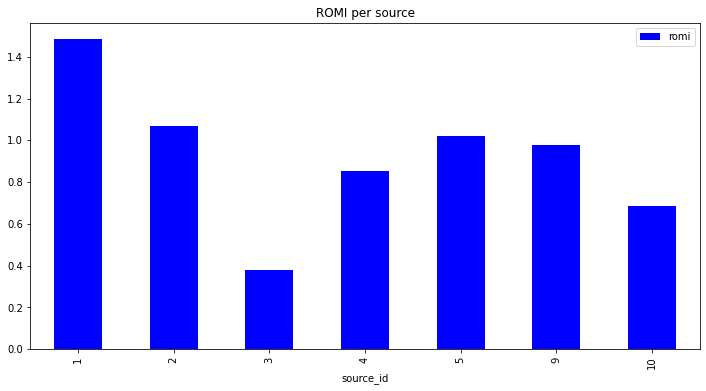

In [80]:
romi_per_source[['source_id', 'romi']].plot(x= 'source_id', y='romi', kind='bar', title= 'ROMI per source', figsize=(12,6), stacked=True, color='blue')



- Source 1 and 2 seem to be the best option for the company to invest
- Source 3 and 10 seem to be the worst option

### Step - Write a conclusion: advise marketing experts how much money to invest and where.

**Study Findings**

Average unique users:

- Daily: 907 // Weekly: 5716 // Monthly: 23228
- Seems more people visit from their computers than from their phones
- Users from both Desktop and Touch devices have sessions of average length of 60 seconds.
- Buyers who made their first visit on the sencond semester have a higher retention rate than those who made their first visit on the first semester =
- There seems to be an increase in retention rate toward the 11th month
- The cohort that made a first purchase on the 6th month seems to have the highest retention of all
- Most users convert on the same day of their first visit
- A smaller percentage converts later on, from 28 to 334 days after their first visit
- Conversion rate is 16%
- On average, each buyer places 0.223 orders per month
- Each customer brings in on average between 0.39 and 1.15 ltv
- The cohort that placed its first order on 2017-09-01 has been the most profitable for the company
- The cohort that placed its first orders on 2018-02-01 seems to be the least profitable, when comparing it with other cohorts' cumulative ltv's


**General Conclusion**
- Invest most of the marketing resources on source 1 
- Sources 3 is the most expensive, and it's romi is the lowest. I suggest to drop this ad source.
- Source 4: while it doesn't have the highest romi, the amount of buyers it brough is substantial compared to other sources, which lets us conclude that this ad source could work  while keeping it's romi 

